<ipython-input-1-5a7381a5ede0>:98: RuntimeWarning: overflow encountered in ubyte_scalars
  k=int(noiseimg[i,j]-finalimg[i,j])


21031.16943359375


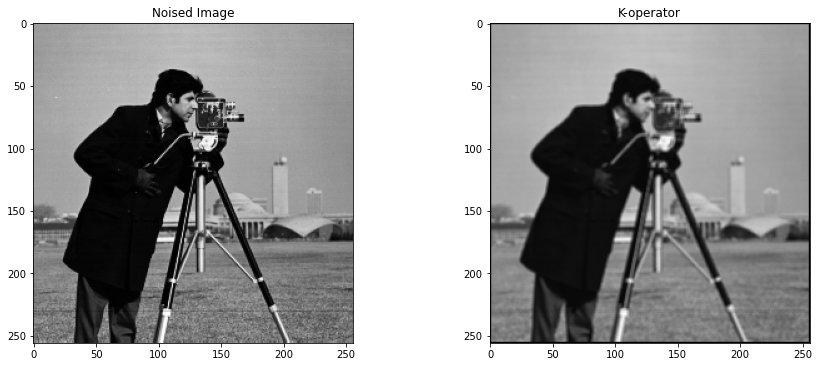

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import random

def Gauss(image,mean,var):
    gauss = np.zeros(image.shape,np.uint8)
    row,col= image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,image.size).astype(np.float32)
    gauss = gauss.reshape(row,col)
    #cv2.randu(gauss,mean,sigma)
    image = image + gauss
    #plt.imshow(noisy,cmap='gray')
    return image

def MeanFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape,np.uint8)
    # creat an empty variable
    result = 0
    # deal with filter size = 3x3
    if filter_size == 9:
        for i in range(1, image.shape[0]-1):
            for j in range(1, image.shape[1]-1):
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        result = result + image[i+x, j+y]
                output[i][j] = int(result / filter_size)
                result = 0
     
    return output
def koperator(image,p,q,a):
     
    # create an empty array with same size as input image
    output = np.zeros(image.shape,dtype=float)
    #dimensions of input image
    row = len(image)
    col = len(image[0])
    #print(image[0,0])
    #here we do Zero-Padding to image as mention in paper
    new_image = np.zeros([row+2,col+2],dtype=float)
    for i in range(row+2):
        for j in range(col+2):
            if i==0 or i==row+1:
                new_image[i,j]=0
            elif j==0 or j==col+1:
                new_image[i,j]=0
            else:
                new_image[i,j]=image[i-1,j-1]
    #print(new_image[1,1])
    
    #now we make a fractional mask using k-opertor of size 3X3
    #we perform masking using p=1 and q=0 and also taking a(alpha) in range(0,2) so we choose a=1
    #for finding these coefficient we also need y1(a) value(given in paper) here for 3X3 filter n=1 and a=1 so a-n=0
    #in this y1(a) function gammma function also given for whose value at 1 = 1 and at 1/2 equals to sqrt(pi)(find these by integral)
    #y1=((-1)**((n-a)/2))*(2**(a-1))*((math.pi)**(n/2))*(math.sqrt(math.pi))
    x=math.sqrt(math.pi)
    #find  gamma value using gamma function
    g1=math.gamma((1-a)/2)
    #now put these value in y1
    y1=((2**(a))*(x))/g1
    #as giving in paper in Table 2 superposition in all eight direction we need to coffiecient Co and C1
    Co=(p+q)/(2*a*y1)
    C1=((2**(a))*p)/(2*a*y1)
    # create the mask array of filter as same size as filter_size of 9 beacuse 3X3 having size 9
    mask = np.zeros([3,3],dtype=float)
    total=(8*Co)+8*(C1)
    for i in range(3):
        for j in range(3):
            if i==1 and j==1:
                mask[i][j]=(8*Co)/total
            else:
                mask[i][j]=C1/total
    #print(mask)
    #apply Fractional-Mask
    output = np.zeros([row+1,col+1],dtype=float)
    result = 0
    #convolution
    for i in range(1, row+1):
            for j in range(1, col+1):
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        result = result + new_image[i+x, j+y]*mask[x+1,y+1]
                output[i][j] = result
                result = 0
    
    #print(output)
    return output

def mseerror(finalimg,noiseimg):
    error = int(0)
    row = len(noiseimg)
    col = len(noiseimg[0])
    for i in range(row):
        for j in range(col):
            k=int(noiseimg[i,j]-finalimg[i,j])
            error = error+(k*k)
            
    error = error/(row*col)
    return error
def psnrerror(mse):
    psnr=20*math.log10(((2**8)-1)/math.sqrt(mse))
    return psnr

#this is main function 
if __name__ == '__main__':
     
    #import the image and stor it in variable "img"
    img = cv2.imread('final1.png')
    #convert original image to grayscale image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #gaussnoise add
    grayImg = Gauss(gray,0,0.03) 
    mean_3x3_lena = MeanFilter(grayImg, 9)
    #filter the image using K-Operator by calling function koperator and pass image as argument
    #finalimg = koperator(grayImg,1.05,0,1.361)
    finalimg = mean_3x3_lena
    mse = mseerror(finalimg,gray)
    psnr = psnrerror(mse)
    print(mse)
    #print(psnr)
    #plt.imshow(img,cmap='gray')
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(15)

    # display the oringinal image
    fig.add_subplot(3, 2, 1)
    plt.title('Noised Image')
    plt.imshow(grayImg, cmap='gray')

    # display the salt and paper image
    fig.add_subplot(3, 2, 2)
    plt.title('K-operator')
    plt.imshow(finalimg, cmap='gray')